In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import os

In [2]:
#plt.rcParams['text.usetex'] = True
#plt.rcParams["figure.figsize"] = (6,5)
#plt.tight_layout()
#plt.rc('legend', fontsize=10)

In [7]:
#
df_gr_trg_effArea_fit = pd.read_csv('gr_trg_effArea_fit.csv')
df_gr_trg_effArea_AdvCam_fit = pd.read_csv('gr_trg_effArea_AdvCam_fit.csv')
df_gr_trg_effArea_AdvCam_fit_stereo = pd.read_csv('gr_trg_effArea_AdvCam_fit_stereo.csv')
df_gr_trg_effArea_AdvCam_vs_PMT_fit = pd.read_csv('gr_trg_effArea_AdvCam_vs_PMT_fit.csv')
#
df_gr_gamma_rates_trg_LST = pd.read_csv('gr_gamma_rates_trg_LST.csv')
df_gr_gamma_rates_trg_LST_AdvCam = pd.read_csv('gr_gamma_rates_trg_LST_AdvCam.csv')
df_gr_gamma_rates_trg_LST_AdvCam_stereo = pd.read_csv('gr_gamma_rates_trg_LST_AdvCam_stereo.csv')
df_gr_gamma_rates_trg_PMT_vs_AdvCam_ratio = pd.read_csv('gr_gamma_rates_trg_PMT_vs_AdvCam_ratio.csv')

In [4]:
df_gr_trg_effArea_AdvCam_fit_stereo

,xx,yy
0,0.005238,3079.96
1,0.005749,4395.27
2,0.006309,6089.25
3,0.006924,8215.27
4,0.007600,10822.70
...,...,...
94,32.896700,786424.00
95,36.104000,790349.00
96,39.624100,794191.00
97,43.487500,797951.00


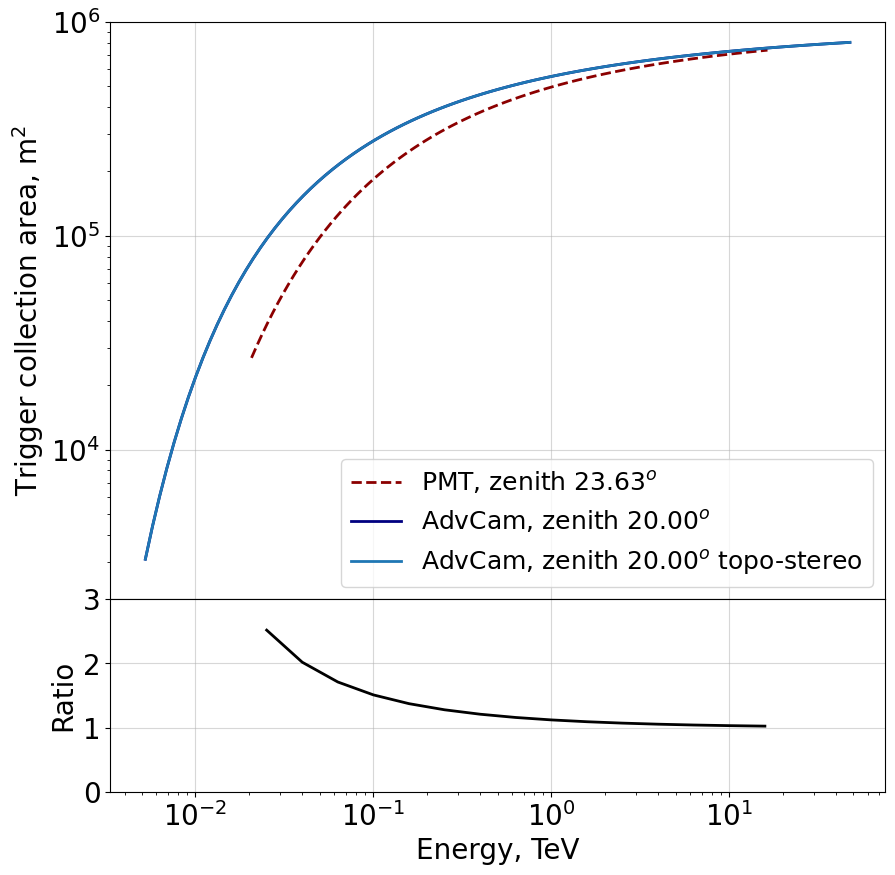

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[3,1],figsize=(10,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

thefontsize=20

#ax[0].set_xlabel('Energy, TeV',fontsize=16)
ax[0].set_ylabel('Trigger collection area, m$^2$',fontsize=thefontsize)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(2.0e+3,1.0e+6);
ax[0].grid(True,alpha=0.5)
#
ax[0].plot(df_gr_trg_effArea_fit['xx'].values,df_gr_trg_effArea_fit['yy'].values,
         lw=2,color='darkred',
         ls='dashed',
         label='PMT, zenith 23.63$^o$')
ax[0].plot(df_gr_trg_effArea_AdvCam_fit['xx'].values,df_gr_trg_effArea_AdvCam_fit['yy'].values,
         lw=2,
         color='navy',
         label='AdvCam, zenith 20.00$^o$')
ax[0].plot(df_gr_trg_effArea_AdvCam_fit_stereo['xx'].values,df_gr_trg_effArea_AdvCam_fit_stereo['yy'].values,
         lw=2,
         label='AdvCam, zenith 20.00$^o$ topo-stereo')
ax[0].legend(fontsize=18)
#
ax[0].tick_params(axis='both', which='major', labelsize=thefontsize)
ax[0].tick_params(axis='both', which='minor', labelsize=thefontsize)

#ax[1].grid(True)
ax[1].plot(df_gr_trg_effArea_AdvCam_vs_PMT_fit['xx'].values,df_gr_trg_effArea_AdvCam_vs_PMT_fit['yy'].values,
         lw=2,
         color='black')
ax[1].set_xlabel('Energy, TeV',fontsize=thefontsize)

#ax[1].hlines(1,0.005,50,ls='dashed',color='grey')
ax[1].grid(True,alpha=0.5)

ax[1].tick_params(axis='both', which='major', labelsize=thefontsize)
ax[1].tick_params(axis='both', which='minor', labelsize=thefontsize)
ax[1].set_ylabel('Ratio',fontsize=thefontsize)
ax[1].set_ylim(0,3);


plt.savefig('trg_effArea_AdvCam_vs_PMT_fit.pdf', bbox_inches='tight')

# plt.show()

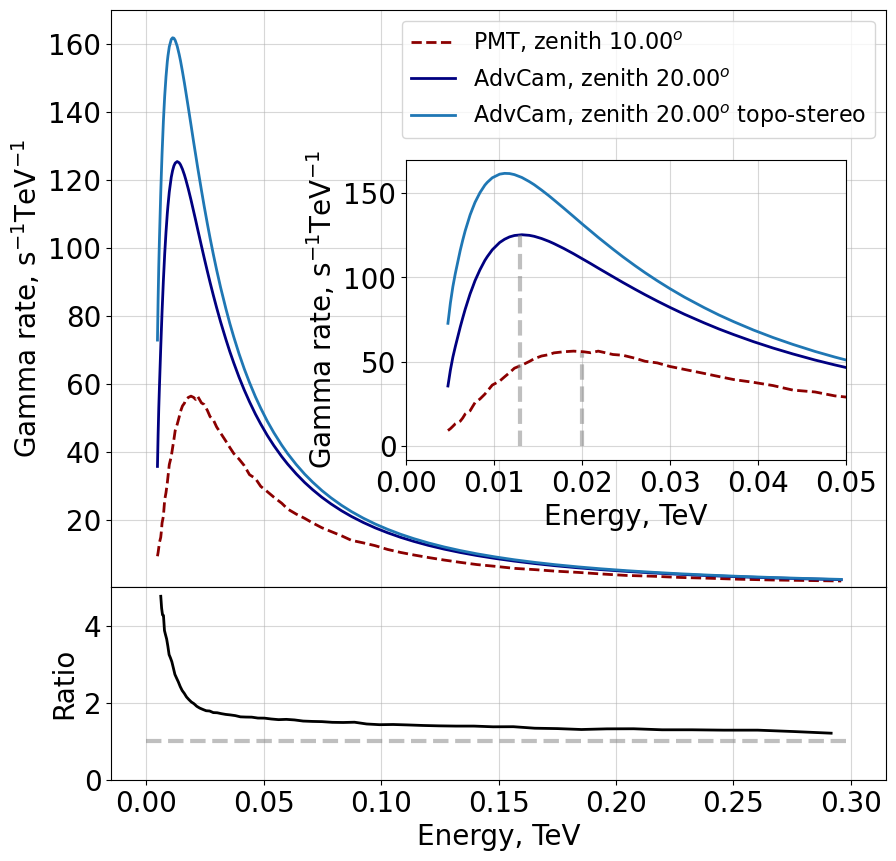

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[3,1],figsize=(10,10))
fig.subplots_adjust(hspace=0.0, wspace=0.0)

#fig, ax = plt.subplots(figsize=(10,10))

thefontsize=20

ax[0].plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values,
        lw=2,color='darkred',
        ls='dashed',
        label='PMT, zenith 10.00$^o$')
ax[0].plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values,
        lw=2,
        color='navy',
        label='AdvCam, zenith 20.00$^o$')

ax[0].plot(df_gr_gamma_rates_trg_LST_AdvCam_stereo['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam_stereo['yy'].values,
        lw=2,
        label='AdvCam, zenith 20.00$^o$ topo-stereo')

ax[0].legend(fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=thefontsize)
ax[0].tick_params(axis='both', which='minor', labelsize=thefontsize)
ax[0].set_xlabel('Energy, TeV',fontsize=thefontsize)
ax[0].set_ylabel('Gamma rate, s$^{-1}$TeV$^{-1}$',fontsize=thefontsize)
ax[0].set_ylim(0.1,170);
ax[0].grid(True,alpha=0.5)


ax_zoom = plt.axes([0.42, 0.43, 0.44, 0.30])  # (left, bottom, width, height)

ax_zoom.plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values,
        lw=2,color='darkred',
        ls='dashed',
        label='PMT, zenith 10.00$^o$')
ax_zoom.plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values,
        lw=2,
        color='navy',
        label='AdvCam, zenith 20.00$^o$')
ax_zoom.plot(df_gr_gamma_rates_trg_LST_AdvCam_stereo['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam_stereo['yy'].values,
        lw=2,
        label='AdvCam, zenith 20.00$^o$ topo-stereo')
ax_zoom.set_xlim(0,0.05);

ax_zoom.set_xlabel('Energy, TeV',fontsize=thefontsize)
ax_zoom.set_ylabel('Gamma rate, s$^{-1}$TeV$^{-1}$',fontsize=thefontsize)
ax_zoom.tick_params(axis='both', which='major', labelsize=thefontsize)
ax_zoom.tick_params(axis='both', which='minor', labelsize=thefontsize)

ax_zoom.vlines(0.02,0.0,55,ls='dashed',color='grey',alpha=0.5,lw=3)
ax_zoom.vlines(0.013,0.0,125,ls='dashed',color='grey',alpha=0.5,lw=3)


ax_zoom.grid(True,alpha=0.5)

ax[1].plot(df_gr_gamma_rates_trg_PMT_vs_AdvCam_ratio['xx'].values,df_gr_gamma_rates_trg_PMT_vs_AdvCam_ratio['yy'].values,
         lw=2,
         color='black')
ax[1].set_xlabel('Energy, TeV',fontsize=thefontsize)

#ax[1].hlines(1,0.005,50,ls='dashed',color='grey')
ax[1].grid(True,alpha=0.5)

ax[1].tick_params(axis='both', which='major', labelsize=thefontsize)
ax[1].tick_params(axis='both', which='minor', labelsize=thefontsize)
ax[1].set_ylabel('Ratio',fontsize=thefontsize)
ax[1].set_ylim(0,5);

ax[1].hlines(1,0.0,0.3,ls='dashed',color='grey',alpha=0.5,lw=3)


plt.savefig('trg_crab_rate_AdvCam_vs_PMT.pdf', bbox_inches='tight')

# ax_zoom = plt.axes([0.56, 0.600, 0.14, 0.150])  # (left, bottom, width, height)
# ax_zoom.plot(timelist1[:500], dfraw_CorrectedI[dfraw_currents['Over Voltage (V)'][28]][:500], '-o',c=colors1[0], label="Cherenkov jump")
# ax_zoom.set_xlim(x_zoom)
# ax_zoom.set_ylim(y_zoom)
# ax_zoom.legend(loc=4, fontsize=11)
# ax_zoom.set_title('Zoomed', fontsize=13)
# ax_zoom = plt.gca()
# ax_zoom.spines['bottom'].set_color('red')
# ax_zoom.spines['top'].set_color('red')
# ax_zoom.spines['left'].set_color('red')
# ax_zoom.spines['right'].set_color('red')
# ax_zoom.tick_params(axis='both', which='major', labelsize=12)
# ax_zoom.tick_params(axis='both', which='minor', labelsize=12)
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_powerlimits((-2, 2))  # Adjust these limits if needed
# ax_zoom.yaxis.set_major_formatter(formatter)
# ax_zoom.yaxis.get_offset_text().set_fontsize(12)

In [ ]:
plt.plot(df_gr_gamma_rates_trg_LST['xx'].values,df_gr_gamma_rates_trg_LST['yy'].values)
plt.plot(df_gr_gamma_rates_trg_LST_AdvCam['xx'].values,df_gr_gamma_rates_trg_LST_AdvCam['yy'].values)